# Analysis of Heart Disease Data

In [57]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing dataset
df = pd.read_csv('heart_disease_dataset.csv')

## Data Cleaning

In [58]:
#Age                      Patient's Age in years.
#Gender                   Patient's gender (e.g., Male/Female).
#Cholesterol              Level of cholesterol in the blood (mg/dL).
#Blood Pressure           Patient’s blood pressure measurement (mmHg).
#Heart Rate               Resting heart rate (beats per minute).
#Smoking                  Smoking status (e.g., Yes/No or pack-years).
#Alcohol Intake           Frequency or quantity of alcohol consumption.
#Exercise Hours           Number of hours exercised per week.
#Family History           Presence of heart disease in close relatives.
#Diabetes                 Whether the patient has diabetes (Yes/No).
#Obesity                  Obesity status based on BMI or body fat percentCholestrol.
#Stress Level             Measured or self-reported stress level.
#Blood Sugar              Blood glucose level (mg/dL).
#Exercise Induced Angina  Chest pain triggered by physical activity (Yes/No).
#Chest Pain Type          Type of chest pain (e.g., typical angina, atypical angina, non-anginal, asymptomatic).
#Heart Disease            Presence or absence of heart disease diagnosis (Yes/No).

print(df.shape)
df.head() 

(1000, 16)


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [59]:
# removing irrelevant columns for the analysis
df = df.drop(['Exercise Hours', 'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar', 'Exercise Induced Angina', 'Chest Pain Type'], axis=1)

print(df.shape)
df.head()

(1000, 9)


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Family History,Heart Disease
0,75,Female,228,119,66,Current,Heavy,No,1
1,48,Male,204,165,62,Current,NaN,No,0
2,53,Male,234,91,67,Never,Heavy,Yes,1
3,69,Female,192,90,72,Current,NaN,No,0
4,62,Female,172,163,93,Never,NaN,No,0


In [60]:
# checking for missing values
df.isnull().sum()

Age                 0
Gender              0
Cholesterol         0
Blood Pressure      0
Heart Rate          0
Smoking             0
Alcohol Intake    340
Family History      0
Heart Disease       0
dtype: int64

In [61]:
#filling nan values with No thinking the person is a non drinker
df['Alcohol Intake'].fillna('No', inplace=True)
df.isnull().sum()


Age               0
Gender            0
Cholesterol       0
Blood Pressure    0
Heart Rate        0
Smoking           0
Alcohol Intake    0
Family History    0
Heart Disease     0
dtype: int64

In [62]:
# checking for duplicates and removing them
print(df.duplicated().sum())
df = df.drop_duplicates()

df.shape

0


(1000, 9)

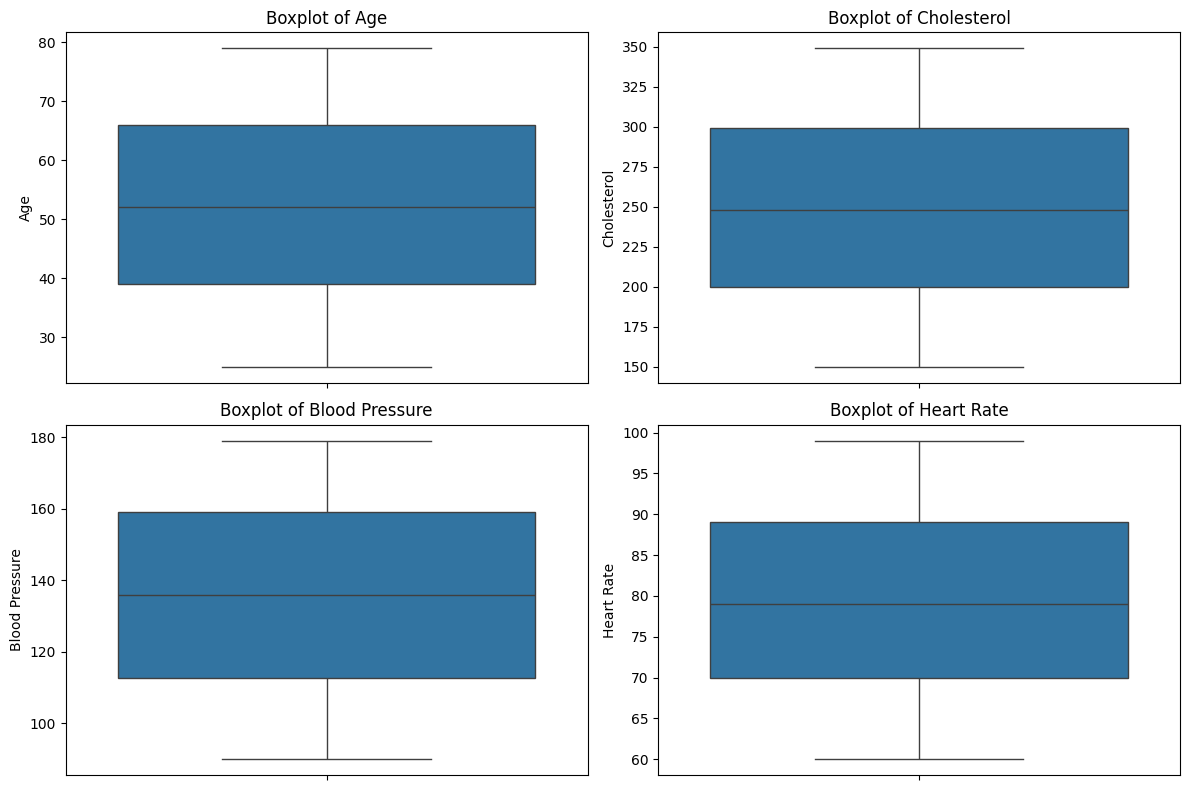

In [63]:
numeric_cols = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate']

plt.figure(figsize=(12, 8))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, idx)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [64]:
# no outliers in the data


## Univariate Analysis

In [65]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Family History,Heart Disease
0,75,Female,228,119,66,Current,Heavy,No,1
1,48,Male,204,165,62,Current,No,No,0
2,53,Male,234,91,67,Never,Heavy,Yes,1
3,69,Female,192,90,72,Current,No,No,0
4,62,Female,172,163,93,Never,No,No,0


### 1. Analysis of Age Distribution

Mean: 52.29
Median: 52.0
Standard Deviation: 15.73
Skewness: -0.03


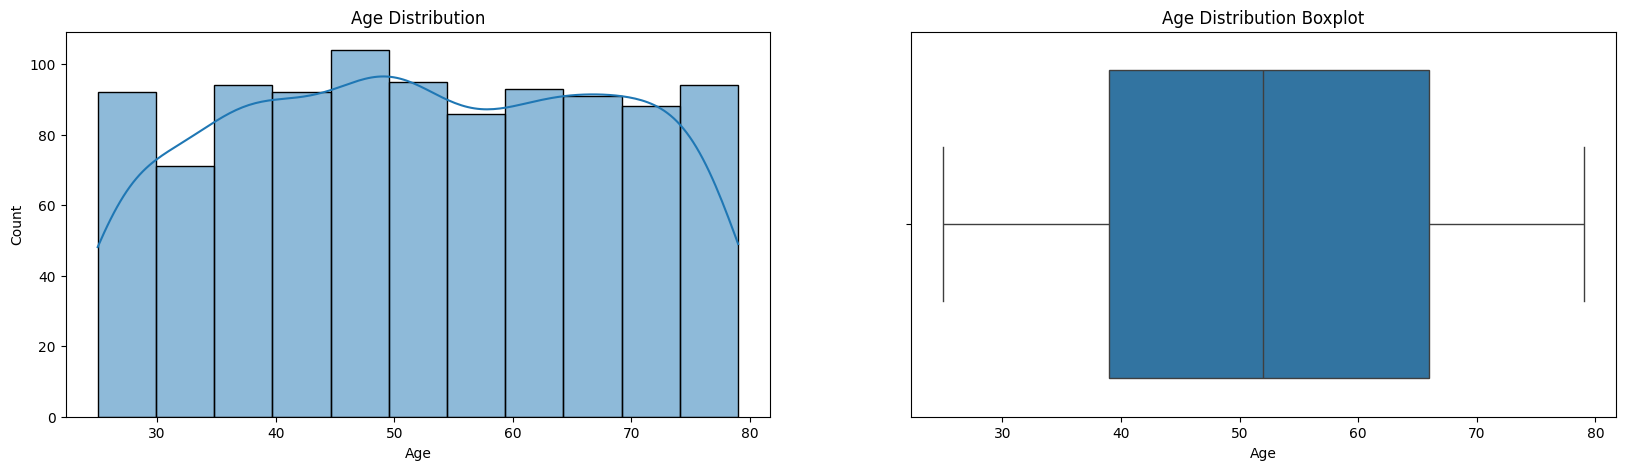

In [66]:
print('Mean:', df['Age'].mean().__round__(2))
print('Median:', df['Age'].median())
print('Standard Deviation:', df['Age'].std().__round__(2))
print('Skewness:', df['Age'].skew().__round__(2))

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title('Age Distribution Boxplot')
plt.show()

### 2. Analysis of Cholestrol Distrubution 

Mean: 249.94
Median: 248.0
Standard Deviation: 57.91
Skewness: 0.01


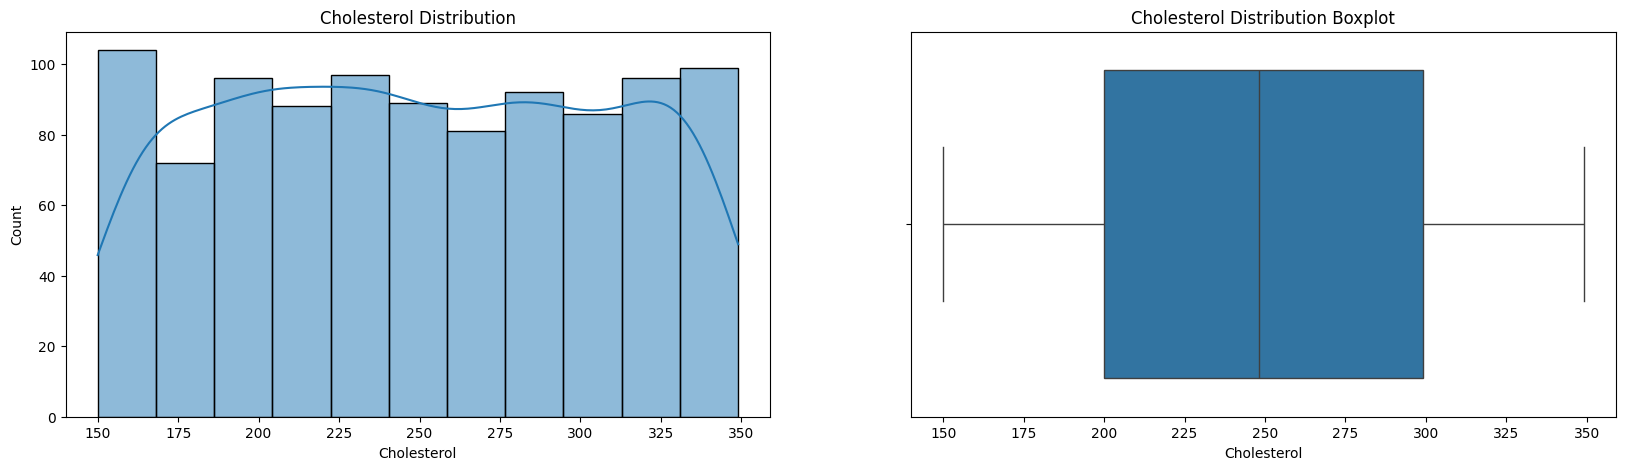

In [67]:

print('Mean:', df['Cholesterol'].mean().__round__(2))
print('Median:', df['Cholesterol'].median())
print('Standard Deviation:', df['Cholesterol'].std().__round__(2))
print('Skewness:', df['Cholesterol'].skew().__round__(2))

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Cholesterol'], kde=True)
plt.title('Cholesterol Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Cholesterol'])
plt.title('Cholesterol Distribution Boxplot')
plt.show()

### 3. Analysis of Blood Pressure Distribution

Mean: 135.28
Median: 136.0
Standard Deviation: 26.39
Skewness: -0.04


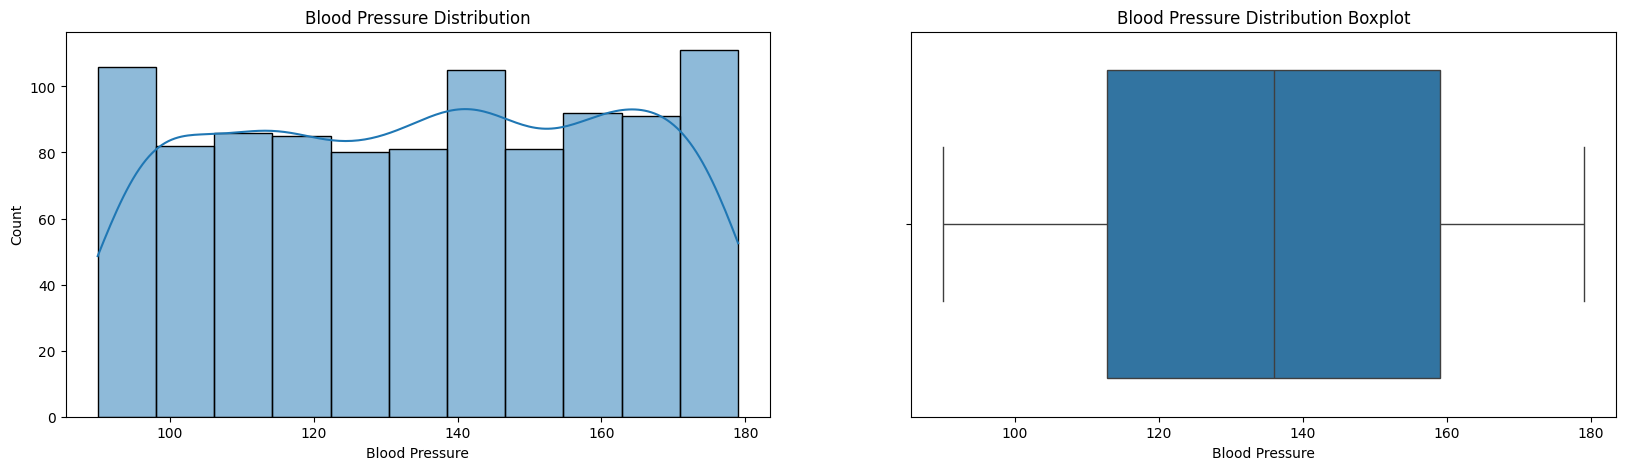

In [68]:
print('Mean:', df['Blood Pressure'].mean().__round__(2))
print('Median:', df['Blood Pressure'].median())
print('Standard Deviation:', df['Blood Pressure'].std().__round__(2))
print('Skewness:', df['Blood Pressure'].skew().__round__(2))

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Blood Pressure'], kde=True)
plt.title('Blood Pressure Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Blood Pressure'])
plt.title('Blood Pressure Distribution Boxplot')
plt.show()

### 4. Analysis of Heart Rate Distribution

Mean: 79.2
Median: 79.0
Standard Deviation: 11.49
Skewness: 0.08


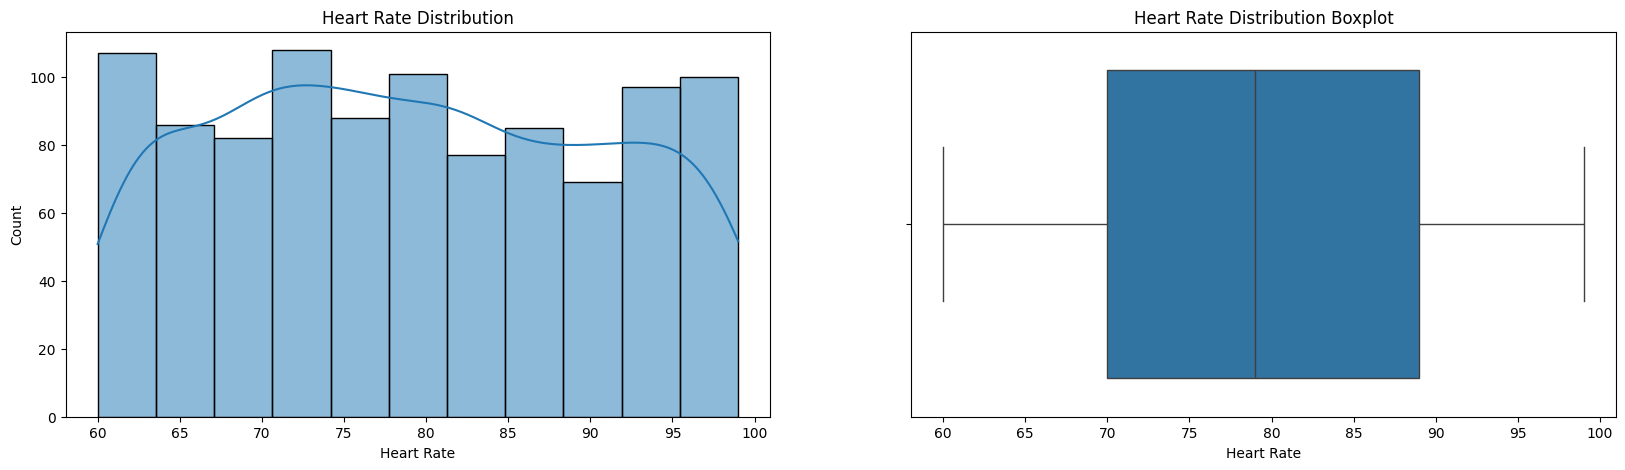

In [69]:
print('Mean:', df['Heart Rate'].mean().__round__(2))
print('Median:', df['Heart Rate'].median())
print('Standard Deviation:', df['Heart Rate'].std().__round__(2))
print('Skewness:', df['Heart Rate'].skew().__round__(2))

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Heart Rate'], kde=True)
plt.title('Heart Rate Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Heart Rate'])
plt.title('Heart Rate Distribution Boxplot')
plt.show()

### 5. Analysis of Gender Distribution

Number of male patients:  497
Number of female patientss:  503


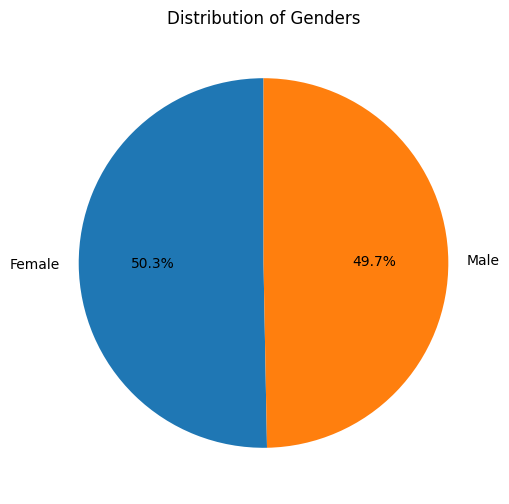

In [70]:
gender_counts = df['Gender'].value_counts()

print("Number of male patients: ", gender_counts["Male"])
print("Number of female patientss: ", gender_counts["Female"])


plt.figure(figsize=(6, 6))
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Genders')
plt.show()


### 6. Analysis of Smoking Distribution

Number of current smoking patients:  336
Number of former smoking patients:  326
Number of non smoking patients:  338


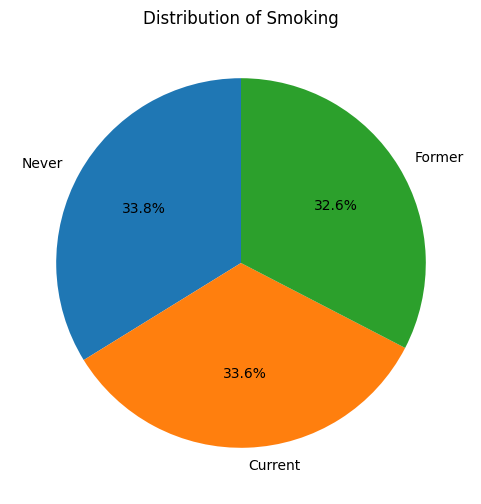

In [72]:
smoking_counts = df['Smoking'].value_counts()

print("Number of current smoking patients: ", smoking_counts["Current"])
print("Number of former smoking patients: ", smoking_counts["Former"])
print("Number of non smoking patients: ", smoking_counts["Never"])

plt.figure(figsize=(6, 6))
plt.pie(smoking_counts,
        labels=smoking_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Smoking')
plt.show()


### 7. Analysis of Alcohol Intake Distribution

Number of patients with heavy alcohol intake::  346
Number of patients with moderate alcohol intake::  314
Number of patients with no alcohol intake::  340


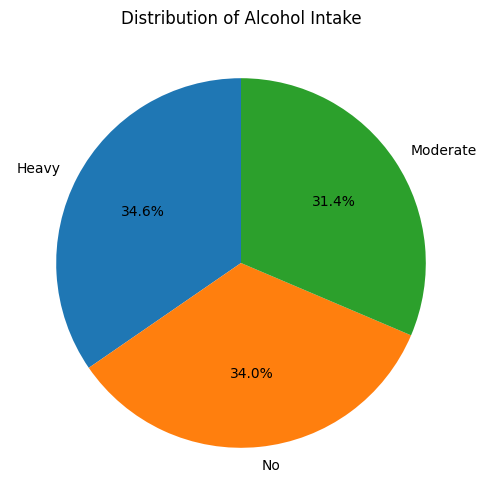

In [73]:
# Calculate the counts for each category in Alcohol Intake
alcohol_intake_counts = df['Alcohol Intake'].value_counts()

print("Number of patients with heavy alcohol intake:: ", alcohol_intake_counts["Heavy"])
print("Number of patients with moderate alcohol intake:: ", alcohol_intake_counts["Moderate"])
print("Number of patients with no alcohol intake:: ", alcohol_intake_counts["No"])

# Plot a pie chart for the distribution of alcohol intake
plt.figure(figsize=(6, 6))
plt.pie(alcohol_intake_counts,
        labels=alcohol_intake_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Alcohol Intake')
plt.show()


### 8. Analysis of Family History Distribution


Number of patients with presence of heart disease in close relatives:  499
Number of patients with no presence of heart disease in close relatives:  501


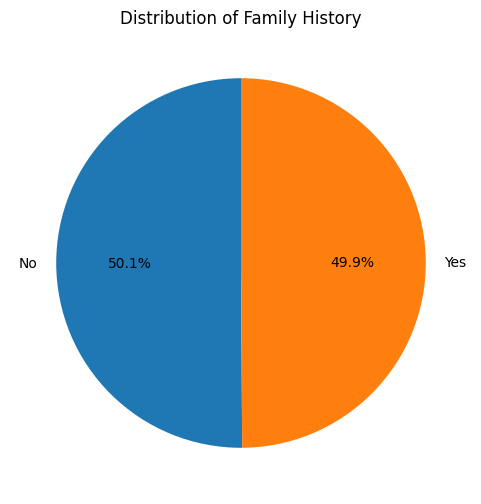

In [74]:

family_history_counts = df['Family History'].value_counts()

print("Number of patients with presence of heart disease in close relatives: ", family_history_counts["Yes"])
print("Number of patients with no presence of heart disease in close relatives: ", family_history_counts["No"])

plt.figure(figsize=(6, 6))
plt.pie(family_history_counts,
        labels=family_history_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Family History')
plt.show()

### 9. Analysis of Heart Disease Distribution

Number of patients with heart disease:  392
Number of patients with no heart disease:  608


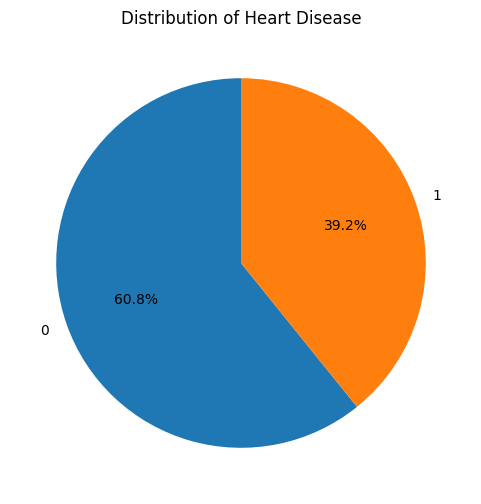

In [75]:
heart_disease_counts = df['Heart Disease'].value_counts()

print("Number of patients with heart disease: ", heart_disease_counts[1])
print("Number of patients with no heart disease: ", heart_disease_counts[0])

plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts,
        labels=heart_disease_counts.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribution of Heart Disease')
plt.show()

## Bivariate Analysis

In [76]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Family History,Heart Disease
0,75,Female,228,119,66,Current,Heavy,No,1
1,48,Male,204,165,62,Current,No,No,0
2,53,Male,234,91,67,Never,Heavy,Yes,1
3,69,Female,192,90,72,Current,No,No,0
4,62,Female,172,163,93,Never,No,No,0


### 1. Correlation between Age and Heart Disease


Correlation Matrix:
                    Age  Heart Disease
Age            1.000000       0.646871
Heart Disease  0.646871       1.000000


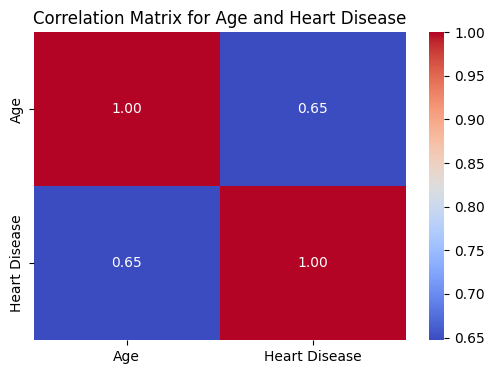

In [77]:
# Assuming df is your DataFrame and has columns 'Age' and 'Heart Disease'
corr_matrix = df[['Age', 'Heart Disease']].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Age and Heart Disease')
plt.show()

<Figure size 1200x600 with 0 Axes>

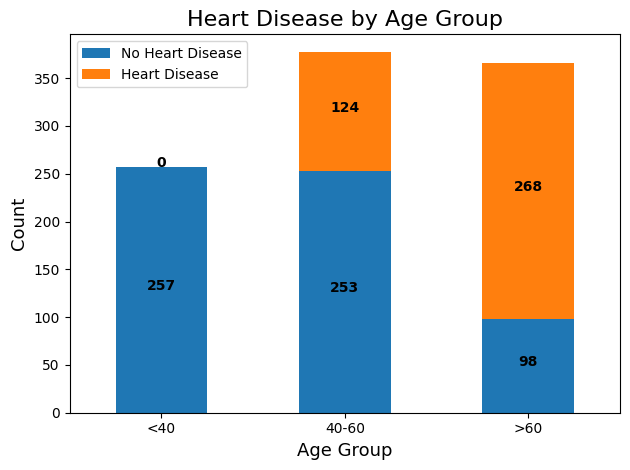

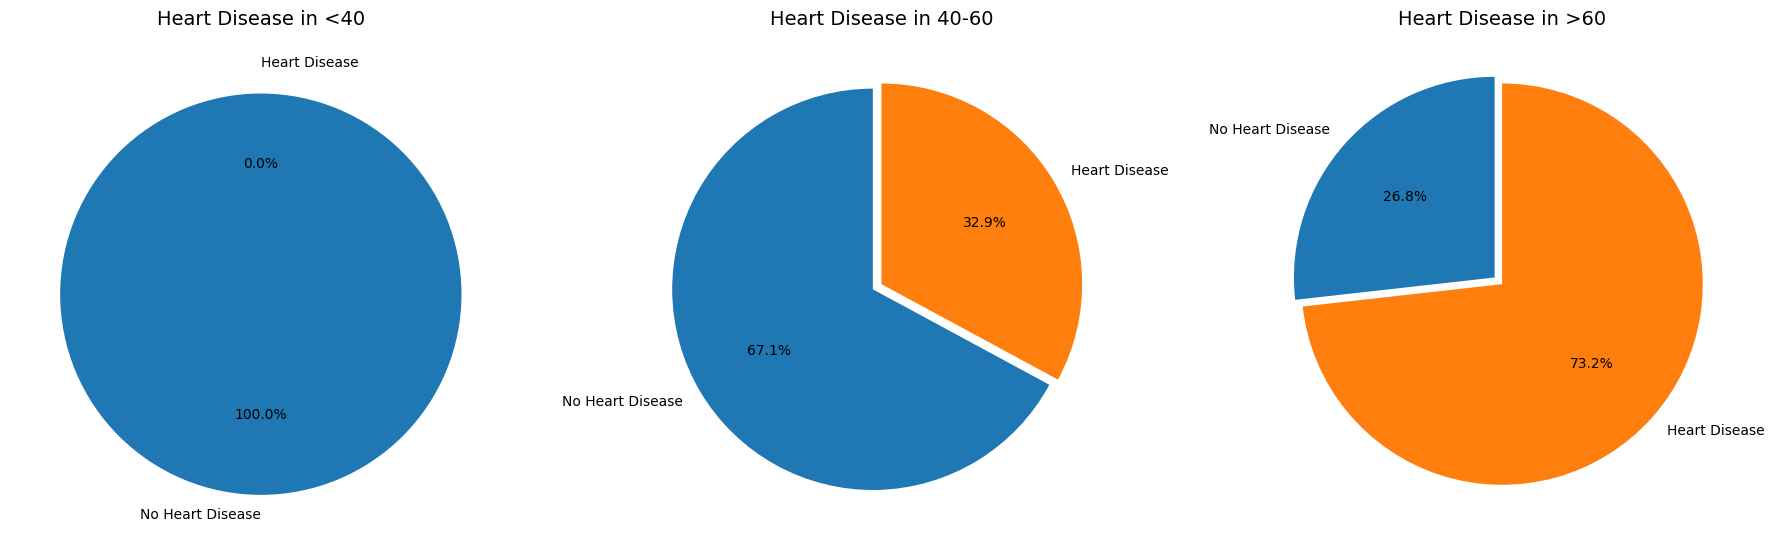

In [78]:
# Define age bins and corresponding labels
age_bins = [0, 40, 60, 100]
age_labels = ['<40', '40-60', '>60']

# Create a new column 'Age Group' with binned age values
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a crosstab between Age Group and Heart Disease
heart_disease_counts = pd.crosstab(df['Age Group'], df['Heart Disease'],
                                   rownames=['Age Group'],
                                   colnames=['Heart Disease'])

# Rename columns: assuming 0 means "No Heart Disease" and 1 means "Heart Disease"
heart_disease_counts.columns = ['No Heart Disease', 'Heart Disease']

# Calculate percentages for each age group (used later for pie charts)
heart_disease_percentages = {}
for group in age_labels:
    group_data = df[df['Age Group'] == group]
    total = len(group_data)
    if total > 0:
        heart = group_data['Heart Disease'].sum()  # Sum assuming Heart Disease is binary (0/1)
        no_heart = total - heart
        heart_disease_percentages[group] = [no_heart/total*100, heart/total*100]
    else:
        heart_disease_percentages[group] = [0, 0]

# ----- Stacked Bar Chart -----
plt.figure(figsize=(12, 6))
heart_disease_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(range(len(age_labels)), age_labels, rotation=0)
plt.legend(['No Heart Disease', 'Heart Disease'])

# Annotate each bar with counts using a numeric index
for i, (age_group, row) in enumerate(heart_disease_counts.iterrows()):
    plt.text(i, row['No Heart Disease'] / 2, str(row['No Heart Disease']),
             fontweight='bold', ha='center')
    plt.text(i, row['No Heart Disease'] + row['Heart Disease'] / 2, str(row['Heart Disease']),
             fontweight='bold', ha='center')

plt.tight_layout()
plt.show()

# ----- Pie Charts for Each Age Group -----
fig, axes = plt.subplots(1, len(age_labels), figsize=(18, 6))
for i, group in enumerate(age_labels):
    axes[i].pie(heart_disease_percentages[group],
                labels=['No Heart Disease', 'Heart Disease'],
                autopct='%1.1f%%',
                startangle=90,
                explode=(0.05, 0))
    axes[i].set_title(f'Heart Disease in {group}', fontsize=14)
plt.tight_layout()
plt.show()

### 2. Correlation between Cholesterol and Heart Disease

Correlation Matrix for Cholesterol and Heart Disease:
               Cholesterol  Heart Disease
Cholesterol       1.000000       0.365041
Heart Disease     0.365041       1.000000


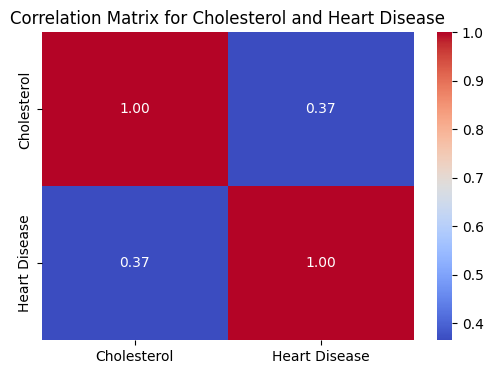

In [79]:
# Calculate the correlation matrix for Cholesterol and Heart Disease
corr_matrix = df[['Cholesterol', 'Heart Disease']].corr()
print("Correlation Matrix for Cholesterol and Heart Disease:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Cholesterol and Heart Disease')
plt.show()

Cholesterol bin edges: [150. 216. 283. 349.]


<Figure size 1200x600 with 0 Axes>

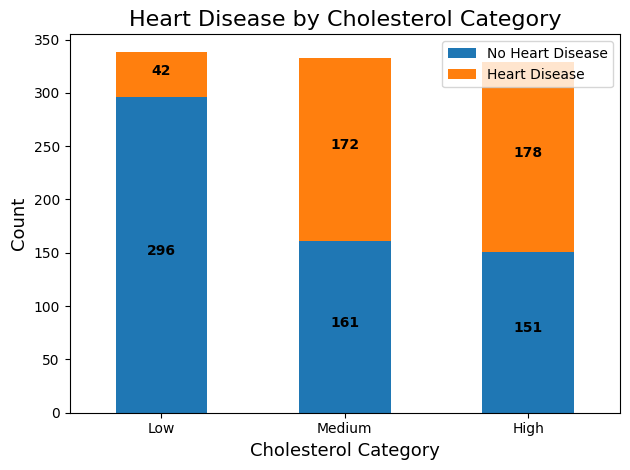

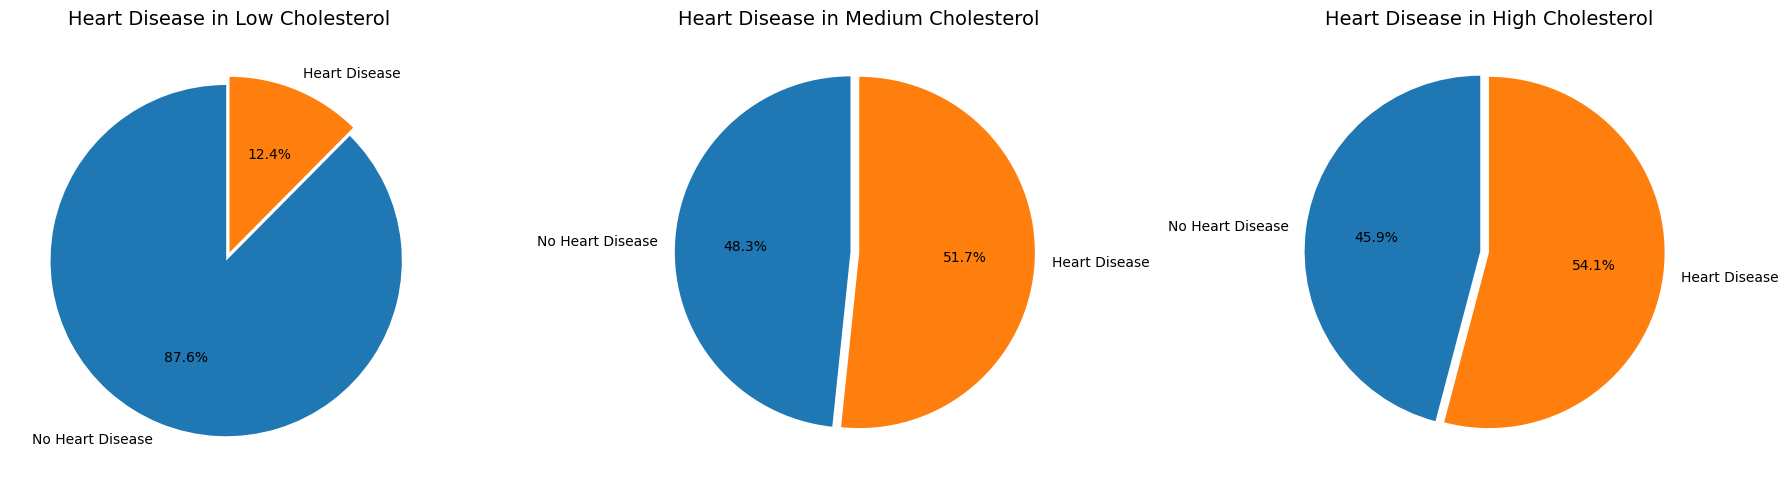

In [80]:
# Bin cholesterol into three categories using quantiles, and capture the bin edges
df['Cholesterol Category'], chol_bins = pd.qcut(df['Cholesterol'], q=3, 
                                                labels=['Low', 'Medium', 'High'],
                                                retbins=True)
print("Cholesterol bin edges:", chol_bins)

# Create a crosstab between the cholesterol categories and heart disease status
cholesterol_counts = pd.crosstab(df['Cholesterol Category'], df['Heart Disease'],
                                 rownames=['Cholesterol Category'],
                                 colnames=['Heart Disease'])

# Rename columns for clarity: assuming 0 means "No Heart Disease" and 1 means "Heart Disease"
cholesterol_counts.columns = ['No Heart Disease', 'Heart Disease']

# Calculate percentage distributions for each cholesterol category (for pie charts)
cholesterol_percentages = {}
for cat in ['Low', 'Medium', 'High']:
    cat_data = df[df['Cholesterol Category'] == cat]
    total = len(cat_data)
    if total > 0:
        heart = cat_data['Heart Disease'].sum()  # Sum assumes binary (0/1)
        no_heart = total - heart
        cholesterol_percentages[cat] = [no_heart/total*100, heart/total*100]
    else:
        cholesterol_percentages[cat] = [0, 0]

# ----- Stacked Bar Chart -----
plt.figure(figsize=(12, 6))
cholesterol_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease by Cholesterol Category', fontsize=16)
plt.xlabel('Cholesterol Category', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(range(len(cholesterol_counts.index)), cholesterol_counts.index, rotation=0)
plt.legend(['No Heart Disease', 'Heart Disease'])

# Annotate each bar with counts using a numeric index
for i, (cat, row) in enumerate(cholesterol_counts.iterrows()):
    plt.text(i, row['No Heart Disease'] / 2, str(row['No Heart Disease']),
             fontweight='bold', ha='center')
    plt.text(i, row['No Heart Disease'] + row['Heart Disease'] / 2, str(row['Heart Disease']),
             fontweight='bold', ha='center')

plt.tight_layout()
plt.show()

# ----- Pie Charts for Each Cholesterol Category -----
fig, axes = plt.subplots(1, len(cholesterol_counts.index), figsize=(18, 6))
for i, cat in enumerate(cholesterol_counts.index):
    axes[i].pie(cholesterol_percentages[cat],
                labels=['No Heart Disease', 'Heart Disease'],
                autopct='%1.1f%%',
                startangle=90,
                explode=(0.05, 0))
    axes[i].set_title(f'Heart Disease in {cat} Cholesterol', fontsize=14)
plt.tight_layout()
plt.show()

### 3. Correlation between Blood Pressure and Heart Disease

Correlation Matrix for Blood Pressure and Heart Disease:
                Blood Pressure  Heart Disease
Blood Pressure          1.0000         0.0069
Heart Disease           0.0069         1.0000


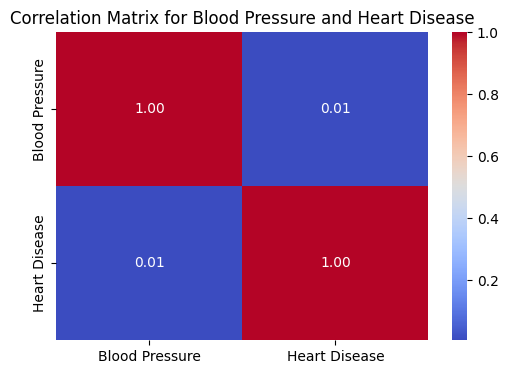

In [81]:
# Assuming df is your DataFrame and has the columns 'Blood Pressure' and 'Heart Disease'
corr_matrix = df[['Blood Pressure', 'Heart Disease']].corr()
print("Correlation Matrix for Blood Pressure and Heart Disease:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Blood Pressure and Heart Disease')
plt.show()

Blood Pressure bin edges: [ 90. 120. 150. 179.]


<Figure size 1200x600 with 0 Axes>

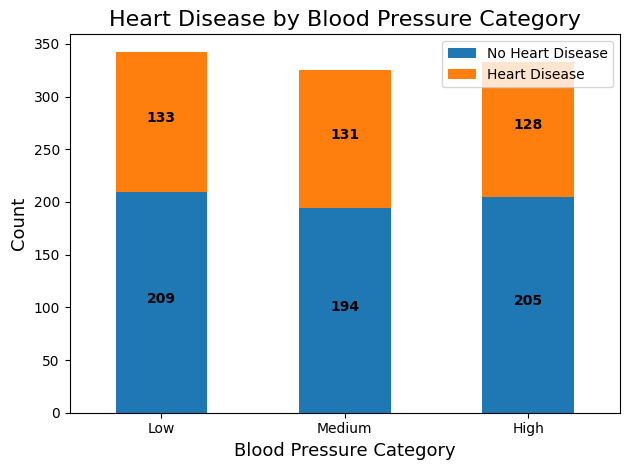

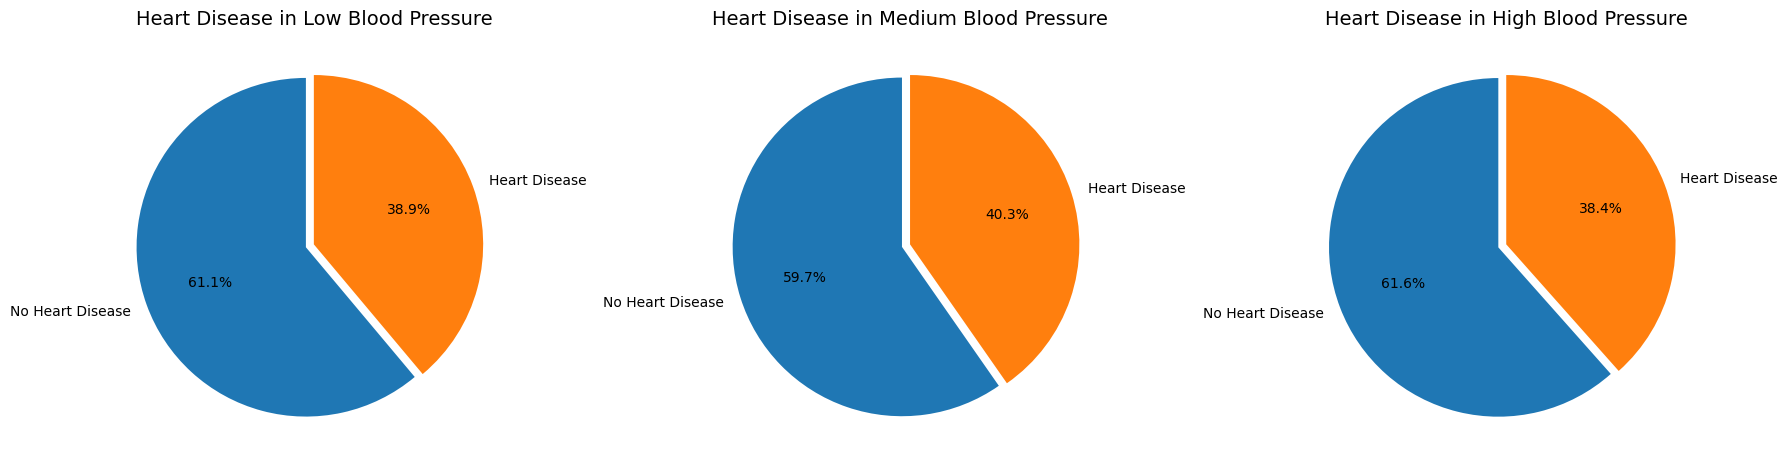

In [82]:
# Step 1: Bin the Blood Pressure values into three categories using quantiles.
df['Blood Pressure Category'], bp_bins = pd.qcut(df['Blood Pressure'], q=3,
                                                 labels=['Low', 'Medium', 'High'],
                                                 retbins=True)
print("Blood Pressure bin edges:", bp_bins)

# Step 2: Create a crosstab between the blood pressure categories and heart disease status.
bp_counts = pd.crosstab(df['Blood Pressure Category'], df['Heart Disease'],
                        rownames=['Blood Pressure Category'],
                        colnames=['Heart Disease'])

# Rename columns for clarity, assuming 0 means "No Heart Disease" and 1 means "Heart Disease"
bp_counts.columns = ['No Heart Disease', 'Heart Disease']

# Step 3: Calculate percentage distributions for each blood pressure category (for pie charts)
bp_percentages = {}
for cat in ['Low', 'Medium', 'High']:
    cat_data = df[df['Blood Pressure Category'] == cat]
    total = len(cat_data)
    if total > 0:
        heart = cat_data['Heart Disease'].sum()  # Sum assumes binary (0/1)
        no_heart = total - heart
        bp_percentages[cat] = [no_heart / total * 100, heart / total * 100]
    else:
        bp_percentages[cat] = [0, 0]

# ----- Stacked Bar Chart -----
plt.figure(figsize=(12, 6))
bp_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease by Blood Pressure Category', fontsize=16)
plt.xlabel('Blood Pressure Category', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(range(len(bp_counts.index)), bp_counts.index, rotation=0)
plt.legend(['No Heart Disease', 'Heart Disease'])

# Annotate each bar with counts using numeric index from enumerate
for i, (bp_cat, row) in enumerate(bp_counts.iterrows()):
    plt.text(i, row['No Heart Disease'] / 2, str(row['No Heart Disease']),
             fontweight='bold', ha='center')
    plt.text(i, row['No Heart Disease'] + row['Heart Disease'] / 2, str(row['Heart Disease']),
             fontweight='bold', ha='center')

plt.tight_layout()
plt.show()

# ----- Pie Charts for Each Blood Pressure Category -----
fig, axes = plt.subplots(1, len(bp_counts.index), figsize=(18, 6))
for i, cat in enumerate(bp_counts.index):
    axes[i].pie(bp_percentages[cat],
                labels=['No Heart Disease', 'Heart Disease'],
                autopct='%1.1f%%',
                startangle=90,
                explode=(0.05, 0))
    axes[i].set_title(f'Heart Disease in {cat} Blood Pressure', fontsize=14)
plt.tight_layout()
plt.show()

### 4. Correlation between Heart Rate and Heart Disease

Correlation Matrix for Heart Rate and Heart Disease:
               Heart Rate  Heart Disease
Heart Rate       1.000000       0.013209
Heart Disease    0.013209       1.000000


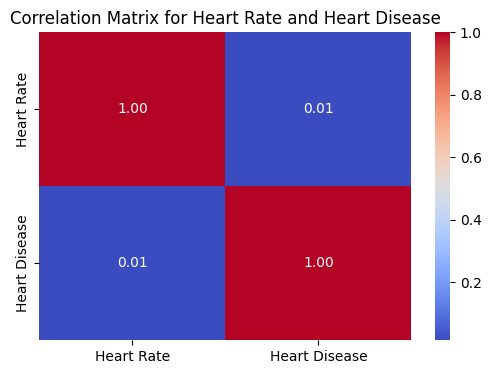

In [83]:
# Assuming df is your DataFrame with columns 'Heart Rate' and 'Heart Disease'
corr_matrix = df[['Heart Rate', 'Heart Disease']].corr()
print("Correlation Matrix for Heart Rate and Heart Disease:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Heart Rate and Heart Disease')
plt.show()

Heart Rate bin edges: [60. 72. 85. 99.]


<Figure size 1200x600 with 0 Axes>

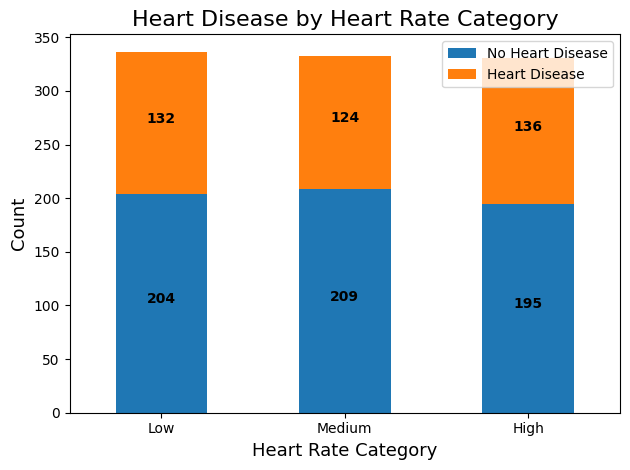

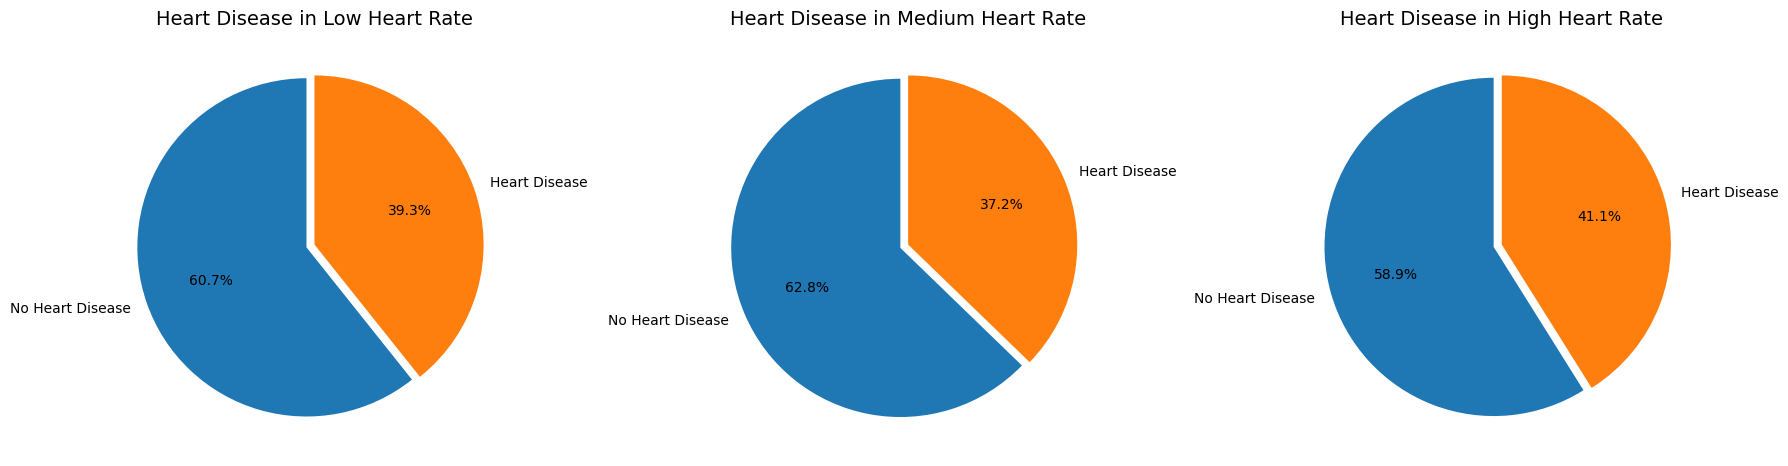

In [84]:
# --- Step 1: Bin Heart Rate ---
# Bin 'Heart Rate' into three quantile-based categories and capture bin edges.
df['Heart Rate Category'], hr_bins = pd.qcut(df['Heart Rate'], q=3, 
                                              labels=['Low', 'Medium', 'High'],
                                              retbins=True)
print("Heart Rate bin edges:", hr_bins)

# --- Step 2: Create a Crosstab ---
# Create a crosstab between the heart rate categories and heart disease status.
hr_counts = pd.crosstab(df['Heart Rate Category'], df['Heart Disease'],
                        rownames=['Heart Rate Category'],
                        colnames=['Heart Disease'])

# Rename columns for clarity: assuming 0 means "No Heart Disease" and 1 means "Heart Disease"
hr_counts.columns = ['No Heart Disease', 'Heart Disease']

# --- Step 3: Calculate Percentage Distributions ---
# Compute percentage distribution for each heart rate category (used for pie charts).
hr_percentages = {}
for cat in ['Low', 'Medium', 'High']:
    cat_data = df[df['Heart Rate Category'] == cat]
    total = len(cat_data)
    if total > 0:
        heart = cat_data['Heart Disease'].sum()  # Sum assumes binary coding (0/1)
        no_heart = total - heart
        hr_percentages[cat] = [no_heart/total*100, heart/total*100]
    else:
        hr_percentages[cat] = [0, 0]

# --- Step 4: Visualize the Data ---

# Stacked Bar Chart
plt.figure(figsize=(12, 6))
hr_counts.plot(kind='bar', stacked=True)
plt.title('Heart Disease by Heart Rate Category', fontsize=16)
plt.xlabel('Heart Rate Category', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(range(len(hr_counts.index)), hr_counts.index, rotation=0)
plt.legend(['No Heart Disease', 'Heart Disease'])

# Annotate each bar with counts using a numeric index.
for i, (cat, row) in enumerate(hr_counts.iterrows()):
    plt.text(i, row['No Heart Disease'] / 2, str(row['No Heart Disease']),
             fontweight='bold', ha='center')
    plt.text(i, row['No Heart Disease'] + row['Heart Disease'] / 2, str(row['Heart Disease']),
             fontweight='bold', ha='center')

plt.tight_layout()
plt.show()

# Pie Charts for Each Heart Rate Category
fig, axes = plt.subplots(1, len(hr_counts.index), figsize=(18, 6))
for i, cat in enumerate(hr_counts.index):
    axes[i].pie(hr_percentages[cat],
                labels=['No Heart Disease', 'Heart Disease'],
                autopct='%1.1f%%',
                startangle=90,
                explode=(0.05, 0))
    axes[i].set_title(f'Heart Disease in {cat} Heart Rate', fontsize=14)
plt.tight_layout()
plt.show()

## Multivariate Analysis

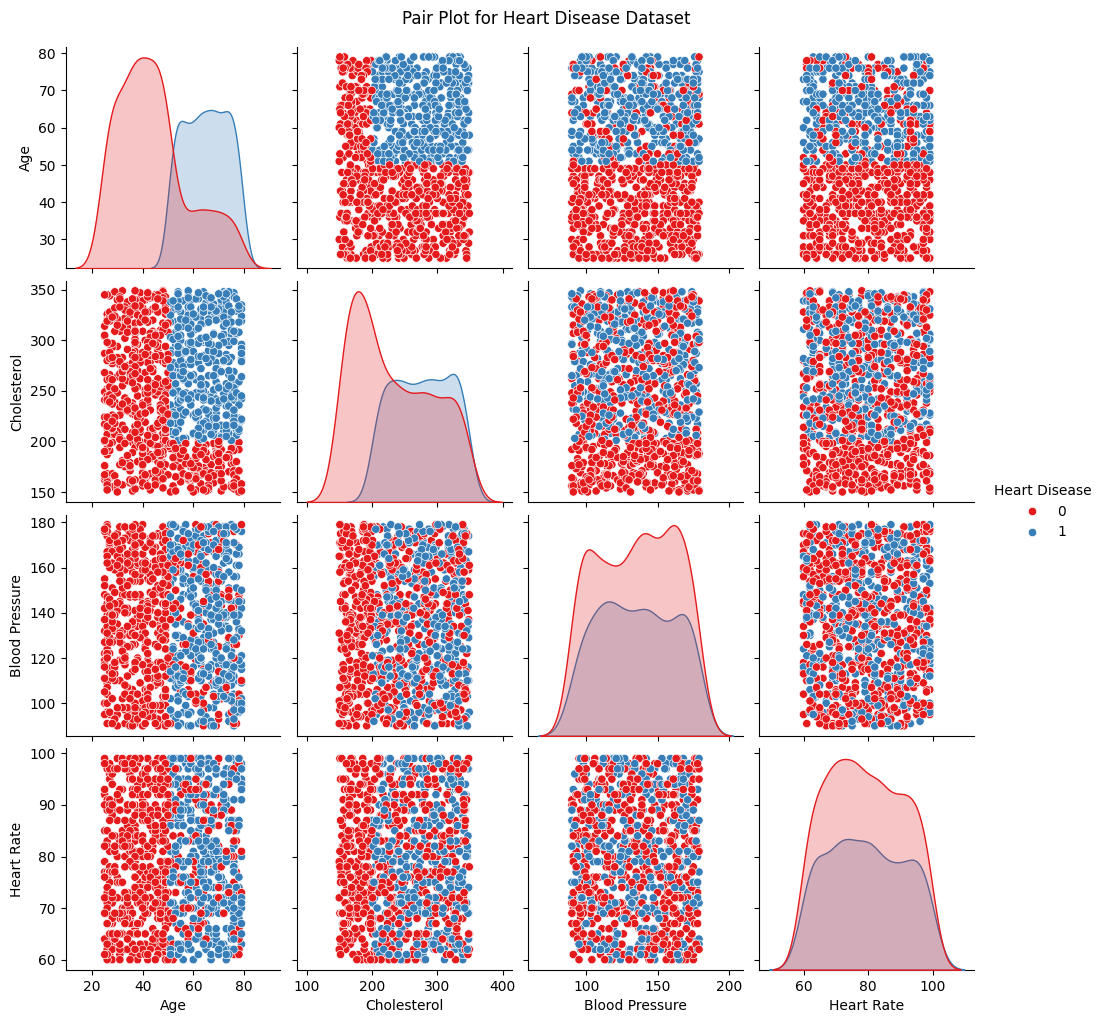

Correlation Matrix:
                     Age  Cholesterol  Blood Pressure  Heart Rate
Age             1.000000    -0.010673        0.002093    0.029027
Cholesterol    -0.010673     1.000000        0.021841   -0.008527
Blood Pressure  0.002093     0.021841        1.000000   -0.001675
Heart Rate      0.029027    -0.008527       -0.001675    1.000000


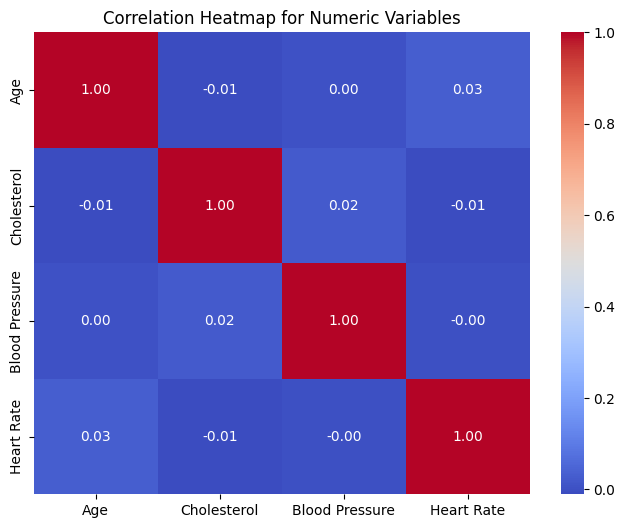

Mean Values of Numeric Variables by Heart Disease Status:
                     Age  Cholesterol  Blood Pressure  Heart Rate
Heart Disease                                                    
0              44.128289   232.972039      135.134868   79.082237
1              64.956633   276.255102      135.507653   79.392857


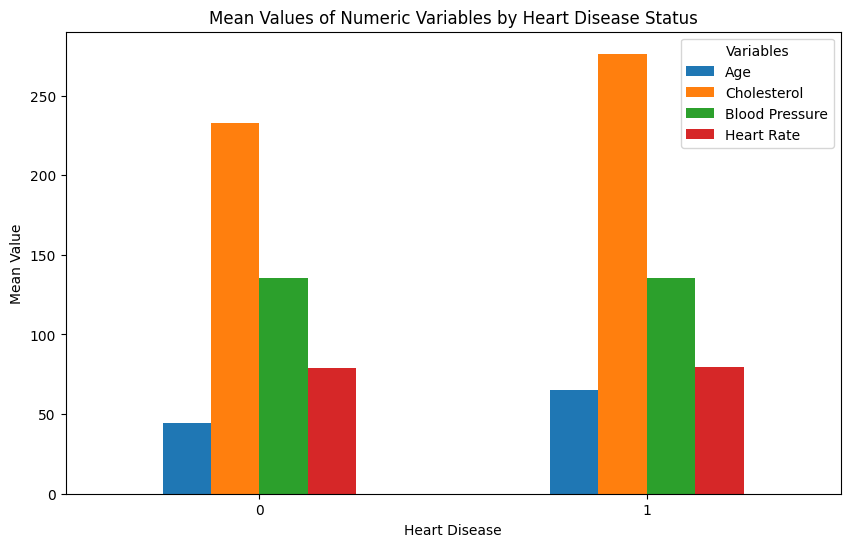

In [85]:
df['Heart Disease'] = df['Heart Disease'].astype('category')

# --------------------------
# 1. Pair Plots
# --------------------------
# Visualize pairwise relationships among continuous variables with heart disease as hue.
sns.pairplot(df[['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Heart Disease']],
             hue='Heart Disease', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot for Heart Disease Dataset', y=1.02)
plt.show()

# --------------------------
# 2. Heatmaps
# --------------------------
# Create a correlation matrix for the numeric variables.
numeric_cols = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate']
corr_matrix = df[numeric_cols].corr()
print("Correlation Matrix:")
print(corr_matrix)

# Plot the correlation matrix as a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()

# --------------------------
# 3. Grouped Comparisons
# --------------------------
# Group the data by Heart Disease status (using observed=False to avoid FutureWarning)
grouped_means = df.groupby('Heart Disease', observed=False)[numeric_cols].mean()
print("Mean Values of Numeric Variables by Heart Disease Status:")
print(grouped_means)

# Visualize the grouped means using a bar plot.
grouped_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of Numeric Variables by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Variables')
plt.show()